### Table of Contents

* [Goals](#goals)
* [Data](#Data)
    * [Loading the Data](#section1_1)
    * [Data Information](#section1_2)
* [Data Cleaning](#cleaning)
    * [Adding an Age Column](#section2_1)
    * [Checking the Education Variable](#section2_2)
* [Exploratory Data Analysis](#EDA)
    * [Big Picture](#section3_1)
    * [Purchasing Behavior by Income](#section3_2)
    * [More Purchasing Behavior by Income](#section3_3)
    * [Purchasing Behavior by Education and Income](#section3_4)
    * [Purchasing Behavior by Age](#section3_5)
* [Conclusion](#conclusion)
    

### Goals <a class="anchor" id="Goals"></a>

This notebook contains an analysis on marketing data. The goal for this project was to do the following:
* Get acquainted with the data
* Clean the data so it is ready for analysis
* Develop some questions for analysis
* Analyze variables within the data to gain patterns and insights on these questions

### Data <a class="anchor" id="Data"></a>

The data for this project was downloaded from Kaggle:

[https://www.kaggle.com/jackdaoud/marketing-data](https://www.kaggle.com/jackdaoud/marketing-data)

Information regarding the features for the data are located in the `Column` section on the website.


#### Loading the Data <a class="anchor" id="section1_1"></a>
First, the necessary libraries are loaded into the notebook. The pandas library is used to import data from marketing_data.csv and preview the first five rows of the DataFrame.

In [3]:
# sets up matplotlib with interactive features
%matplotlib notebook
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [4]:
marketing_data = pd.read_csv("/Users/Sunny/Documents/datasets/data-analyst-portfolio/marketing_data.csv")
# see all columns
pd.set_option('display.max_columns', None)
marketing_data.head()

import warnings
warnings.filterwarnings('ignore')

#### Data Information <a class="anchor" id="section1_2"></a>

Some immediate insights are:
* There are 28 columns and 2240 rows.
* The name and datatype of each column -- most values are integers in this dataset.
* The ` income` column has missing data, values that are not integers or floats, and an extra space in the column name, so some cleaning will be necessary for this column prior to conducting EDA. 
* The column names could be renamed for more consistency.
* Some basic summary statistics on each of the numerical variables.

In [5]:
marketing_data.columns

Index(['id', 'YearBirth', 'Education', 'MaritalStatus', 'Income', 'Kidhome',
       'Teenhome', 'DtCustomer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProducts', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [6]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2240 non-null   int64 
 1   YearBirth            2240 non-null   int64 
 2   Education            2240 non-null   object
 3   MaritalStatus        2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   DtCustomer           2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProducts      2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [7]:
# see what columns have missing data
marketing_data.isnull().sum()

id                      0
YearBirth               0
Education               0
MaritalStatus           0
Income                 24
Kidhome                 0
Teenhome                0
DtCustomer              0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProducts         0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [8]:
print(marketing_data.describe())

                 id    YearBirth      Kidhome     Teenhome      Recency  \
count   2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804     0.444196     0.506250    49.109375   
std     3246.662198    11.984069     0.538398     0.544538    28.962453   
min        0.000000  1893.000000     0.000000     0.000000     0.000000   
25%     2828.250000  1959.000000     0.000000     0.000000    24.000000   
50%     5458.500000  1970.000000     0.000000     0.000000    49.000000   
75%     8427.750000  1977.000000     1.000000     1.000000    74.000000   
max    11191.000000  1996.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000

#### Data Cleaning <a class="anchor" id="cleaning"></a>

Cleaning the `Income` column and renaming column names for more consistency.
* Putting all columns in snake case format using regex and list comprehension
* Changing `Income` values to floats
* Setting the values as floats

The `Income` distribution is then looked at using boxplots. Since there is one large outlier, it is removed from the `marketing_data`. Next, the missing values are replaced with the mean income using the `.mean()` method.

In [9]:
# Clean Columns

#taking dollar sign out of values and convert to float
marketing_data['Income'] = marketing_data['Income'].replace('[\$,]', '', regex=True).astype(float)

# summary stats
marketing_data['Income'].describe()

# put all columns into snake case format
marketing_data.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', x).lower() for x in marketing_data.columns]

<IPython.core.display.Javascript object>


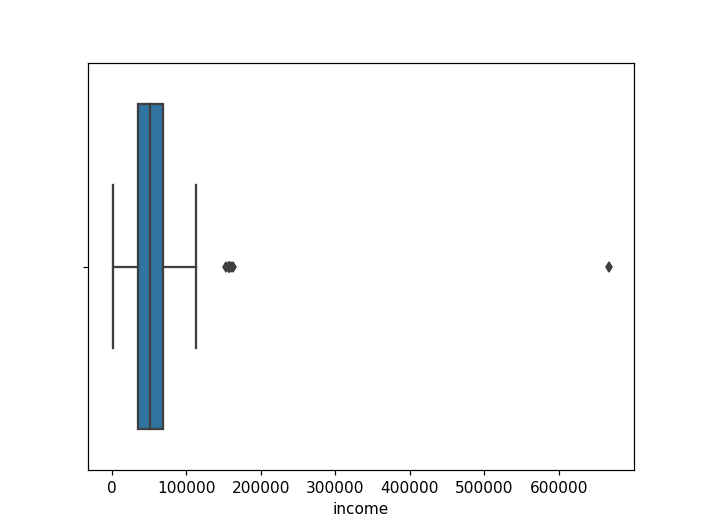

In [12]:
plt.figure()
sns.boxplot(marketing_data["income"])
plt.show()

This boxplot shows a major outlier on the right, so it is removed from the dataset. 

<IPython.core.display.Javascript object>


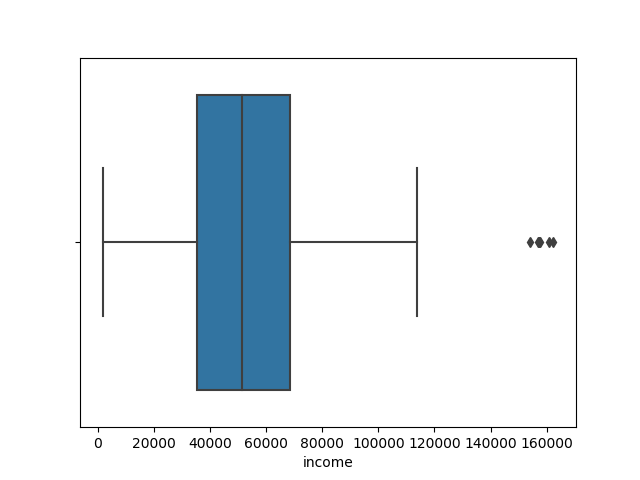

count      2215.000000
mean      51969.861400
std       21526.320095
min        1730.000000
25%       35284.000000
50%       51373.000000
75%       68487.000000
max      162397.000000
Name: income, dtype: float64

In [9]:
# remove incomes below 300000
marketing_data = marketing_data[marketing_data['income']<300000]

plt.figure()
sns.boxplot(marketing_data["income"])
plt.show()


marketing_data['income'].describe()

After removing the outlier, the distribution is more symmetric. There are still some outliers; however, with not major skewness or huge outliers remaining, the `income` variable is ready for analysis.

In [10]:
# replace missing values with the mean income
marketing_data['income'] = marketing_data['income'].fillna(marketing_data['income'].mean())

#### Adding an age Column <a class="anchor" id="section2_1"></a>

The `marketing_data` DataFrame contains a `year_birth` column; however, a column with the age of each customer may be easier for analysis. Because of this, the following is done:

* A new column called `age` is made by subracting each value of `year_birth` from 2020 (the year the dataset is from). 
* Any outliers in `age` that could affect the analysis are removed. 

In [11]:
marketing_data['age'] = 2020 - marketing_data['year_birth']

<IPython.core.display.Javascript object>


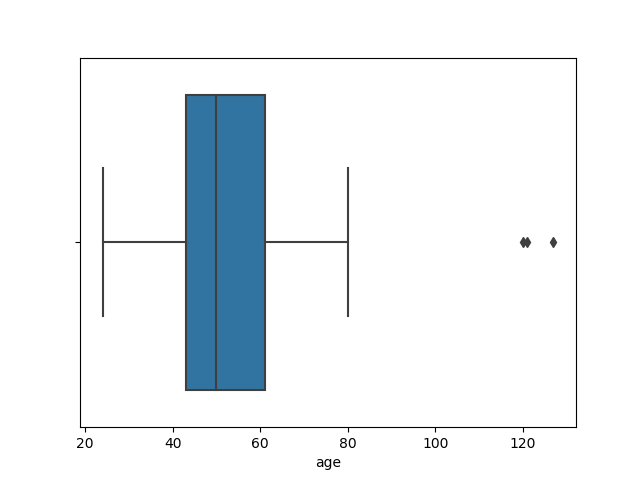

count    2215.000000
mean       51.183296
std        11.987000
min        24.000000
25%        43.000000
50%        50.000000
75%        61.000000
max       127.000000
Name: age, dtype: float64

In [12]:
plt.figure()
sns.boxplot(marketing_data["age"])
plt.show()

marketing_data["age"].describe()

In [13]:
marketing_data = marketing_data[marketing_data["age"] < 100]

<IPython.core.display.Javascript object>


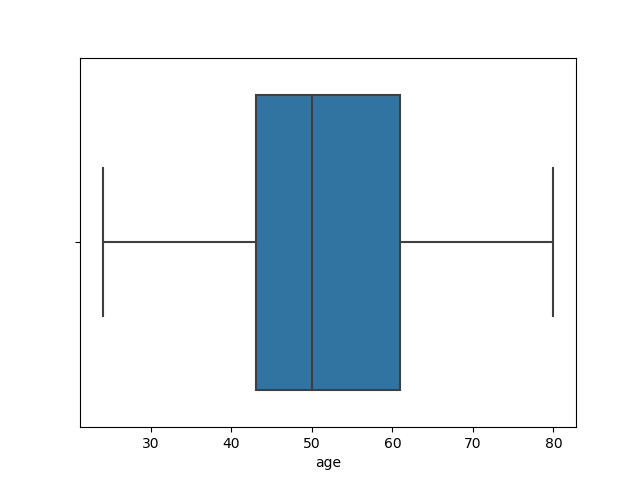

count    2212.000000
mean       51.086347
std        11.701599
min        24.000000
25%        43.000000
50%        50.000000
75%        61.000000
max        80.000000
Name: age, dtype: float64

In [14]:
plt.figure()
sns.boxplot(marketing_data["age"])
plt.show()

marketing_data["age"].describe()

After removing the major outliers the `age` distribution is symmetric and ready for analysis.

#### Checking the Education Variable <a class="anchor" id="section2_2"></a>

The education variable is another column that will be focused on in the analysis. A boxplot is used to see if any cleaning is needed before EDA. There is no missing data or other issues, so it can be left as is.

<IPython.core.display.Javascript object>


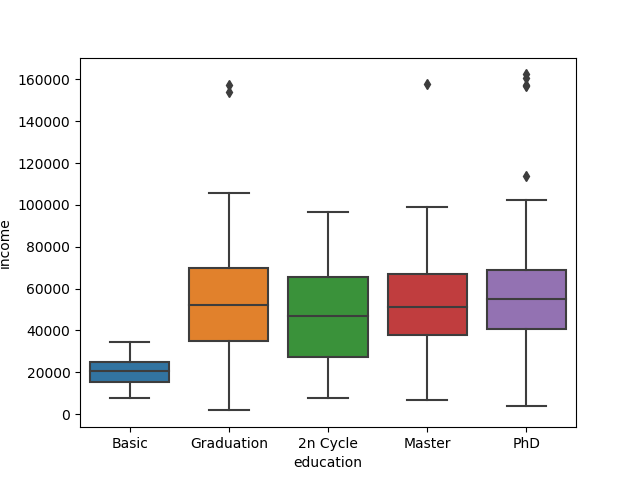

In [15]:
plt.figure()
sns.boxplot(x = marketing_data["education"], y=marketing_data["income"], 
            order=["Basic", "Graduation", "2n Cycle", "Master", "PhD"])
plt.show()

### Exploratory Data Analysis <a class="anchor" id="EDA"></a>

After some data cleaning and tidying, the DataFrame is ready for EDA. The following independent variables will be focused on in the analysis:
* `income`
* `education`
* `age`

The goal will be to see how these independent variables associate with the following dependent variables:
* `mnt_wines`
* `mnt_fruits`
* `mnt_meat_products`
* `mnt_fish_products`
* `mnt_sweet_products`  
* `mnt_gold_products`  
* `num_deals_purchases`
* `num_web_purchases`  
* `num_catalog_purchases`  
* `num_store_purchases`

The hope is that through summary statistics and visualizations the following question can be answered:
* Does a shopper's income, education level, and/or age relate to their purchasing behavior? 

#### Big Picture <a class="anchor" id="section3_1">

In order to observe the dataset as a whole, `DataFrame.hist()` is used.. It gives a full view of all numerical variables in the distribution. Most of the amount bought and number purchased variables are skewed right and have similar distributions.

Next, correlations between all numerical variables are viewed using a heat matrix. The heat matrix shows that `income` has the strongest association with numerous variables. Interestingly, it showed that `age` may not be a huge factor overall. This is something to look into it a bit more in the analysis.

<IPython.core.display.Javascript object>


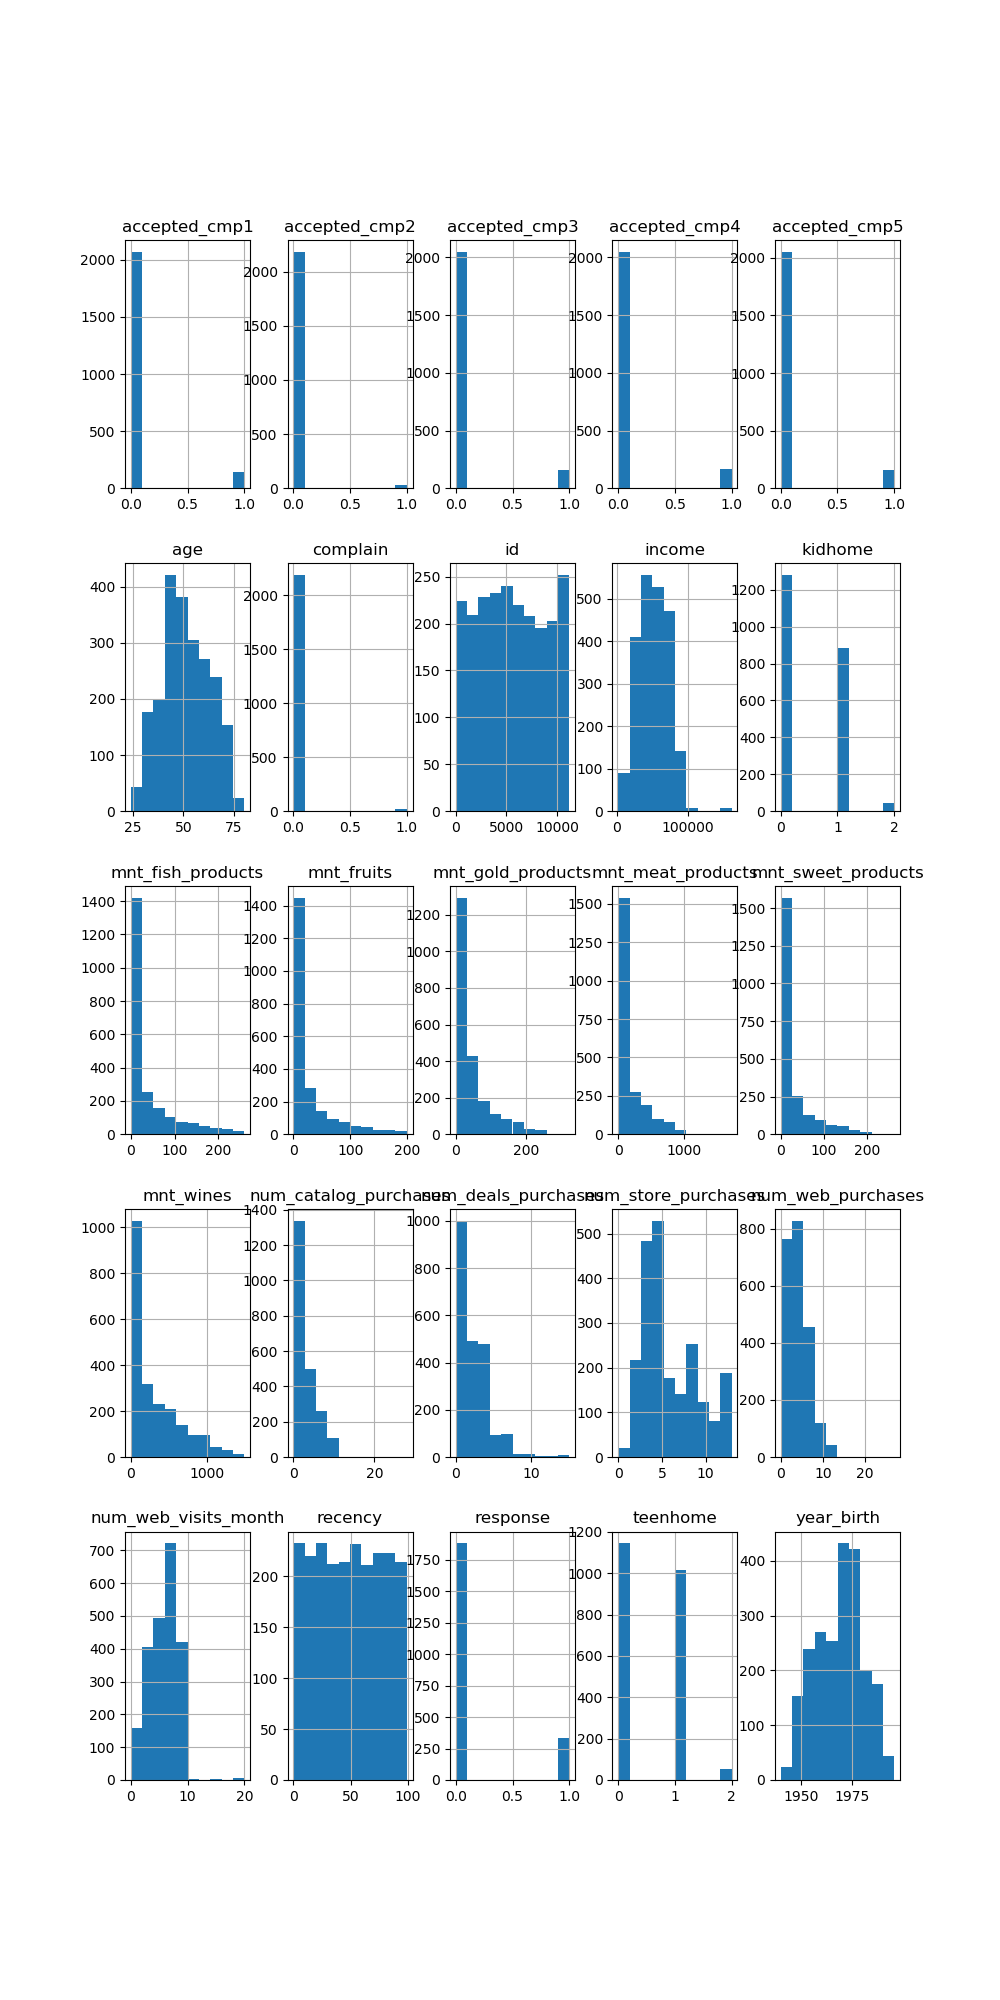

In [16]:
fig = plt.figure(figsize = (10,20))
ax = fig.gca()
marketing_data.hist(ax = ax);

This overview shows that the purchase behavior columns are all skewed to the right.

In [17]:
marketing_data.corr()

,id,year_birth,income,kidhome,teenhome,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_products,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,response,complain,age
id,1.000000,0.005086,0.000905,0.000971,-0.003508,-0.044147,-0.018906,0.010008,-0.003706,-0.022405,-0.004381,-0.008013,-0.040849,-0.017232,-0.000404,-0.011733,-0.008610,-0.035668,-0.023692,-0.004441,-0.017989,-0.014901,-0.021112,0.031839,-0.005086
year_birth,0.005086,1.000000,-0.199977,0.237497,-0.361932,-0.015694,-0.164615,-0.013447,-0.033622,-0.041154,-0.021516,-0.059779,-0.066156,-0.162265,-0.125856,-0.138998,0.120282,0.061097,-0.070035,0.019025,-0.011941,-0.007821,0.020937,-0.004602,-1.000000
income,0.000905,-0.199977,1.000000,-0.514523,0.034565,0.007965,0.688209,0.507354,0.692279,0.520040,0.523599,0.388299,-0.108207,0.459265,0.696589,0.631424,-0.650257,-0.015152,0.219633,0.395569,0.327524,0.104036,0.161387,-0.027900,0.199977
kidhome,0.000971,0.237497,-0.514523,1.000000,-0.039066,0.010623,-0.497203,-0.373258,-0.439031,-0.388643,-0.377843,-0.354922,0.216594,-0.372327,-0.504598,-0.501863,0.447258,0.016135,-0.162111,-0.204582,-0.174261,-0.081911,-0.077901,0.037067,-0.237497
teenhome,-0.003508,-0.361932,0.034565,-0.039066,1.000000,0.014392,0.003945,-0.175905,-0.261134,-0.205235,-0.163107,-0.018579,0.386805,0.162239,-0.112477,0.049212,0.130985,-0.042797,0.038168,-0.190119,-0.145198,-0.015633,-0.154402,0.007746,0.361932
recency,-0.044147,-0.015694,0.007965,0.010623,0.014392,1.000000,0.015981,-0.005257,0.022914,0.000788,0.025244,0.018148,0.002591,-0.005680,0.024197,-0.000460,-0.018965,-0.032361,0.017520,0.000233,-0.021147,-0.001429,-0.200114,0.005713,0.015694
mnt_wines,-0.018906,-0.164615,0.688209,-0.497203,0.003945,0.015981,1.000000,0.385844,0.568081,0.396915,0.389583,0.391461,0.009117,0.553663,0.634237,0.640219,-0.321616,0.061360,0.373349,0.472889,0.351610,0.206309,0.246320,-0.036420,0.164615
mnt_fruits,0.010008,-0.013447,0.507354,-0.373258,-0.175905,-0.005257,0.385844,1.000000,0.546740,0.593038,0.571474,0.393459,-0.134191,0.302301,0.485611,0.459875,-0.417741,0.014644,0.006598,0.208990,0.192417,-0.009924,0.123007,-0.002956,0.013447
mnt_meat_products,-0.003706,-0.033622,0.692279,-0.439031,-0.261134,0.022914,0.568081,0.546740,1.000000,0.572986,0.534624,0.357556,-0.121128,0.306841,0.733787,0.486349,-0.539194,0.018416,0.091677,0.375252,0.313379,0.043549,0.237966,-0.021017,0.033622
mnt_fish_products,-0.022405,-0.041154,0.520040,-0.388643,-0.205235,0.000788,0.396915,0.593038,0.572986,1.000000,0.583484,0.426299,-0.143147,0.299428,0.532241,0.457885,-0.446151,-0.000276,0.016058,0.194793,0.261712,0.002322,0.108135,-0.019098,0.041154


<IPython.core.display.Javascript object>


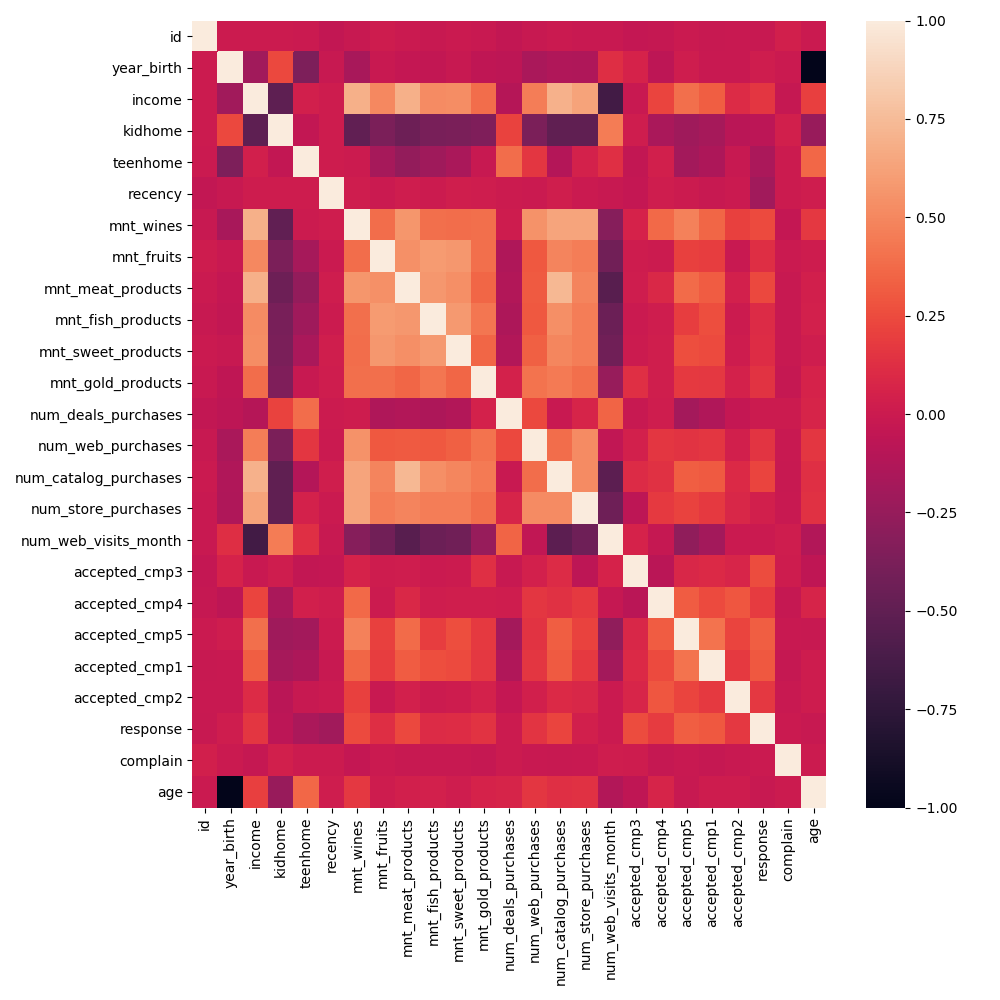

In [18]:
plt.figure(figsize=(10,10))
# heat matrix that shows correlation across all numerical variables
sns.heatmap(data=marketing_data.corr(),annot=False)
plt.tight_layout()
plt.show()

The table of correlations does not offer much help as there are too many numbers to read through. However, the heat map shows that `income` will be the major variable to focus on in the analysis. 

#### Purchasing Behavior by Income <a class="anchor" id="section3_2"></a>

A `for` loop is used to see the relationship bewteen `income` and each `num_{type}_purchases` variable. The `hue` parameter with the `education` variable is used to see if there are any patterns that can be deciphered between `education` and `num_{type}_purchases`. 

First scatterplots are used and then regression plots are used for this analysis.

<IPython.core.display.Javascript object>


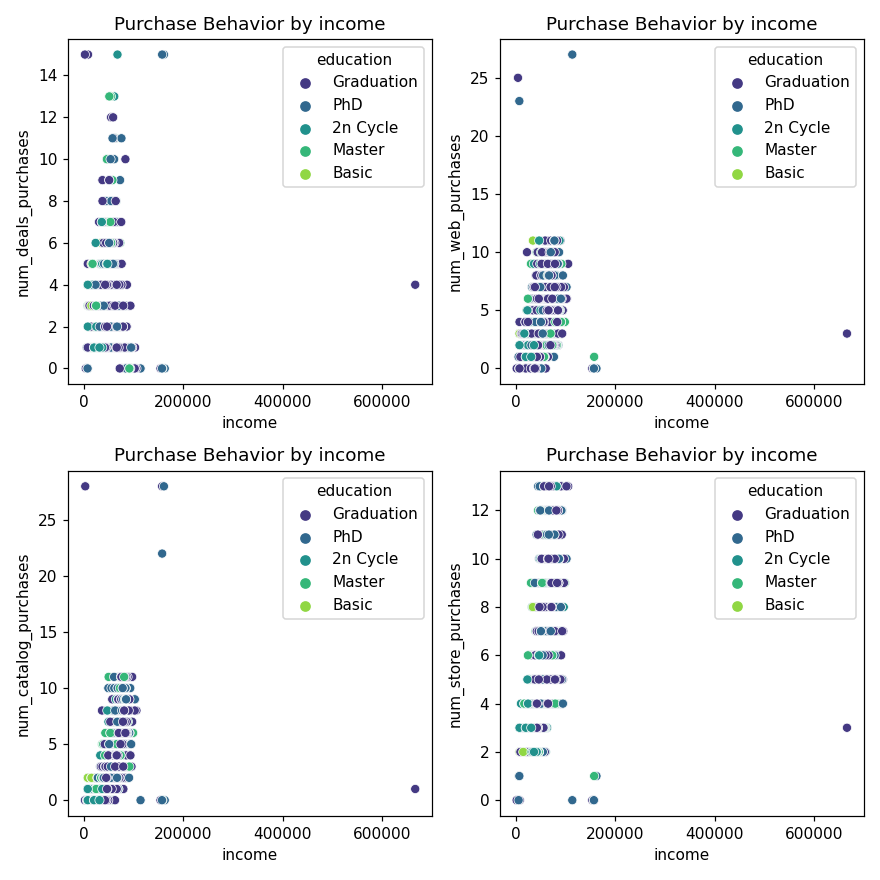

In [13]:
# num purchases columns list
num_purchases_cols = ["num_deals_purchases", "num_web_purchases", "num_catalog_purchases", "num_store_purchases"]
# keeps count of plot for subplots
plot = 0
fig = plt.figure(figsize=(8,8))
# loop through number of columns to plot
for i in range(len(num_purchases_cols)):
    plot += 1
    # subplot to create grid of plots
    ax = plt.subplot(2, 2, plot)
    # scatterplot of purchase type vs income with education
    sns.scatterplot(x=marketing_data["income"], y= marketing_data[num_purchases_cols[i]], 
                    hue=marketing_data["education"], palette="viridis")
    plt.title("Purchase Behavior by income")

plt.tight_layout()
plt.show()

There is a fairly strong, positive linear relationship between `income` and the following three variables:
* `num_catalog_purchases`
* `num_store_purchases`
* `num_web_purchases`

Between `income` and `NumDealsPurchaes`, however, there is no obvious relationship. It appears there might be a weak, negative linear relationship but it is not strong enough to be confident. It is also difficult to decipher any patterns associated with `education` in the plots, so further analysis will be done on this variable.

<IPython.core.display.Javascript object>


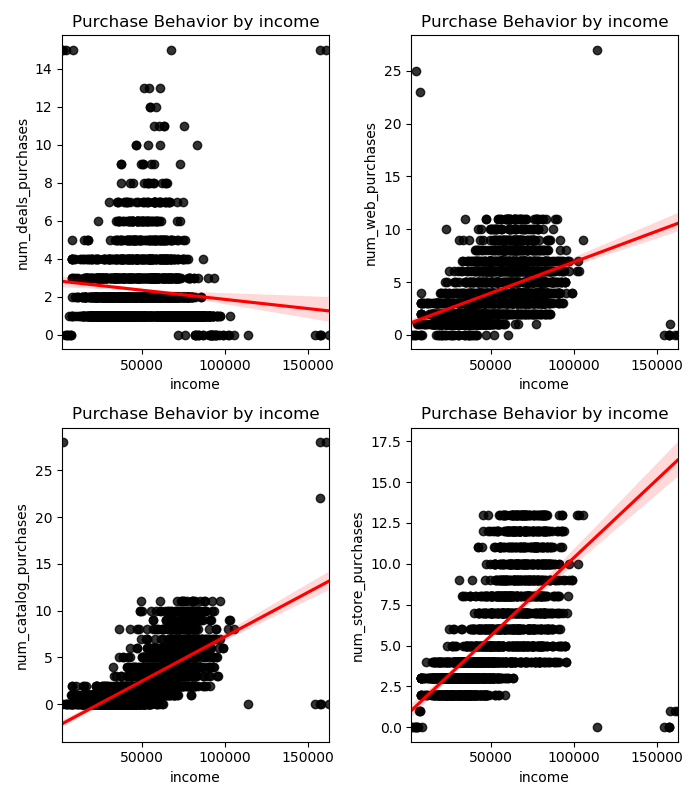

In [20]:
# num purchases columns list
num_purchases_cols = ["num_deals_purchases", "num_web_purchases", "num_catalog_purchases", "num_store_purchases"]
# keeps count of plot for subplots
fig = plt.figure(figsize=(7,8))
plot = 0
# loop through number of columns to plot
for i in range(len(num_purchases_cols)):
    plot += 1
    # set up subplots
    ax = plt.subplot(2, 2, plot)
    # regression plot of purchases vs. income
    sns.regplot(x=marketing_data["income"], y= marketing_data[num_purchases_cols[i]], 
                scatter_kws={"color": "black"}, line_kws={"color": "red"})
    plt.title("Purchase Behavior by income")
plt.tight_layout()
plt.show()

To get a better look at the linear relationships, `.regplot()` was used. `num_catalog_purchases` and `num_store_purchases` have the strongest positive, linear relationship with `income`. 

These plots also show that `income` and `num_deals_purchases` have a linear, negative relationship; however, it is still too weak to be conclusive.

For some further analysis, a new column in the DataFrame called `total_purchases` is added to the `marketing_data` DataFrame. It is the sum of all `num_{type}_purchases` variables. The same analysis with `.scatterplot()` and `.regplot()` plot methods is done on this new column.

In [21]:
# add new total_purchases column to marketing_data
marketing_data["total_purchases"] = marketing_data["num_deals_purchases"]+marketing_data["num_catalog_purchases"] + marketing_data["num_web_purchases"] + marketing_data["num_store_purchases"]

<IPython.core.display.Javascript object>


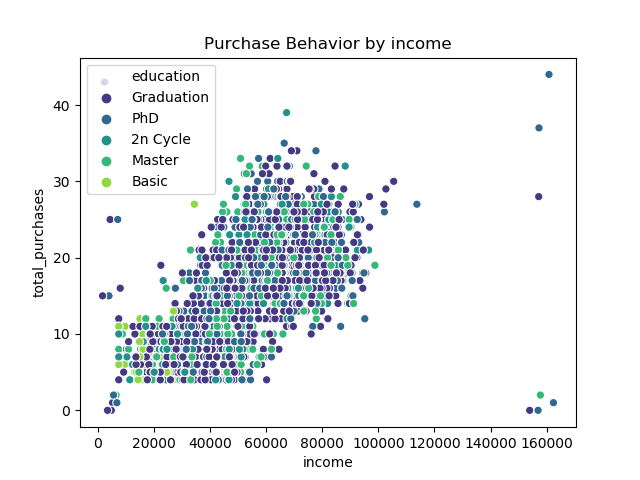

In [22]:
plt.figure()
# scatterplot of total_purchases vs. income
sns.scatterplot(y=marketing_data["total_purchases"], x=marketing_data["income"], 
                hue=marketing_data['education'], palette="viridis")
plt.title("Purchase Behavior by income")
plt.show()

<IPython.core.display.Javascript object>


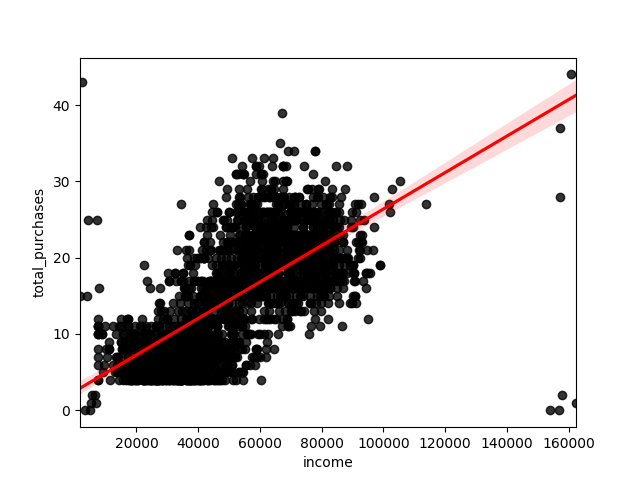

In [23]:
plt.figure()
# regression plot of total_purchases vs income
sns.regplot(y=marketing_data["total_purchases"], x=marketing_data["income"], 
            scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.show()

The overall relationship between `income` and `total_purchases` is strong and linear. Unfortunately, it is still hard to decipher any relationship with the `education` and `total_purchases` as the points are scattered randomly across the plot.

#### More Purchasing Behavior by Income <a class="anchor" id="section3_3"></a>

The following analysis is very similar as before. However, instead of looking at the relationship between `income` and `num_{type}_purchases`, this analysis will be looking at the relationship between `income` and `mnt_{type}_products`. The steps for this analysis will essentially be the same.

<IPython.core.display.Javascript object>


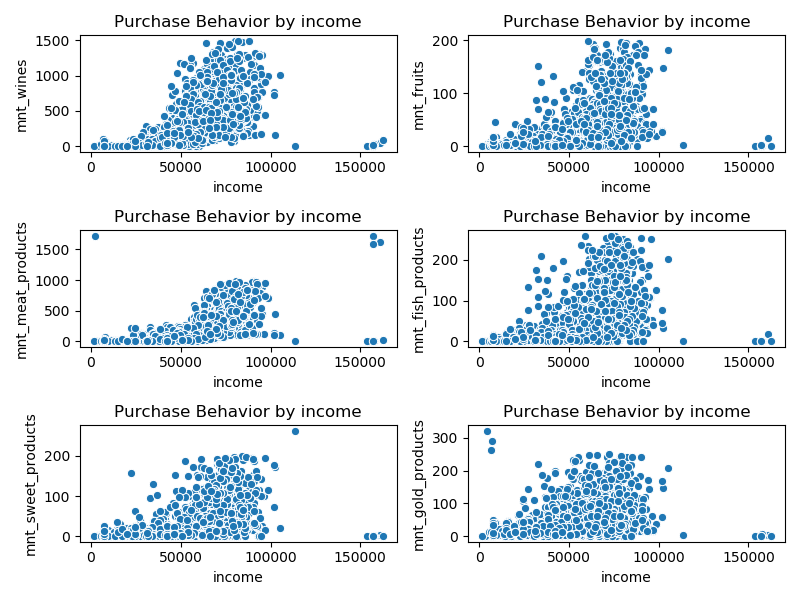

In [24]:
# amounts of items list
amounts_list = ["mnt_wines", "mnt_fruits", "mnt_meat_products", "mnt_fish_products", "mnt_sweet_products", "mnt_gold_products"]
plot = 0
fig = plt.figure(figsize=(8,6))
# for loop to go through length of amounts list
for i in range(len(amounts_list)):
    plot += 1
    # set up subplots
    ax = plt.subplot(3, 2, plot)
    # scatterplot of amount of items bought vs. income
    sns.scatterplot(y= marketing_data[amounts_list[i]], x=marketing_data["income"])
    plt.title("Purchase Behavior by income")
plt.tight_layout()
plt.show()

These plots all show a positive relationship between `income` and each `mnt_{type}_products` variable. However, there is not enough visual evidence to see that it is linear. For further analysis, The *log* scale of the the `income` variable and the `mnt_{type}_products` variables are plotted.

<IPython.core.display.Javascript object>


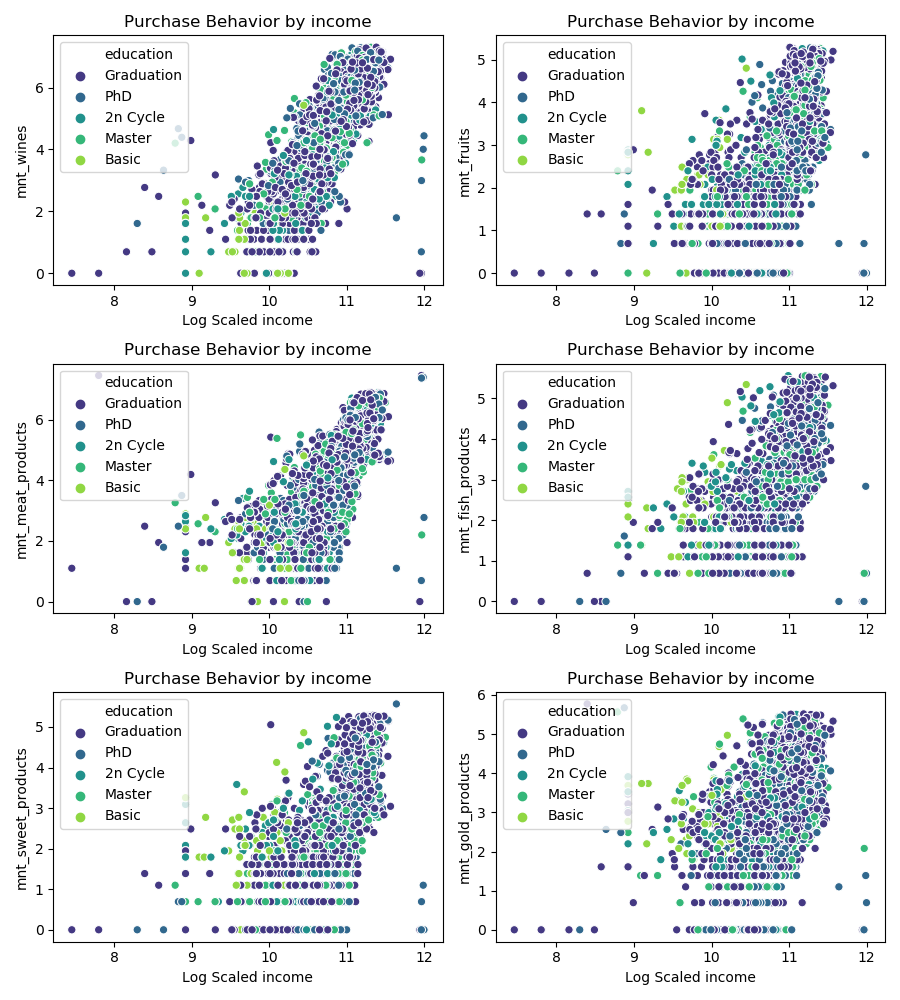

In [25]:
amounts_list = ["mnt_wines", "mnt_fruits", "mnt_meat_products", "mnt_fish_products", "mnt_sweet_products", "mnt_gold_products"]
axes = [None for column in amounts_list]
plot = 0
fig = plt.figure(figsize=(9,10))
for i in range(len(amounts_list)):
    plot += 1
    ax = plt.subplot(3, 2, plot)
    sns.scatterplot(y=np.log(marketing_data[amounts_list[i]]), x=np.log(marketing_data["income"]), 
                    hue=marketing_data["education"], palette="viridis")
    ax.set_xlabel("Log Scaled income")
    plt.title("Purchase Behavior by income")
plt.tight_layout()
plt.show()

With the *log* scaled variables, it is easy to see there is an fairly strong linear, positive relationship between the variables across the board. It is still hard to see how education plays a role, however.

#### Purchasing Behavior by Education and Income <a class="anchor" id="section3_4"></a>

A seaborn method called `.FacetGrid()` is used to see how education effects purchasing behavior along with `income`. It gives a much clearer picture than the `hue` parameter in previous plots. In this analysis, a loop and a dynamic Python variable are used to plot six sets of `.FacetGrid()` plots.

<IPython.core.display.Javascript object>


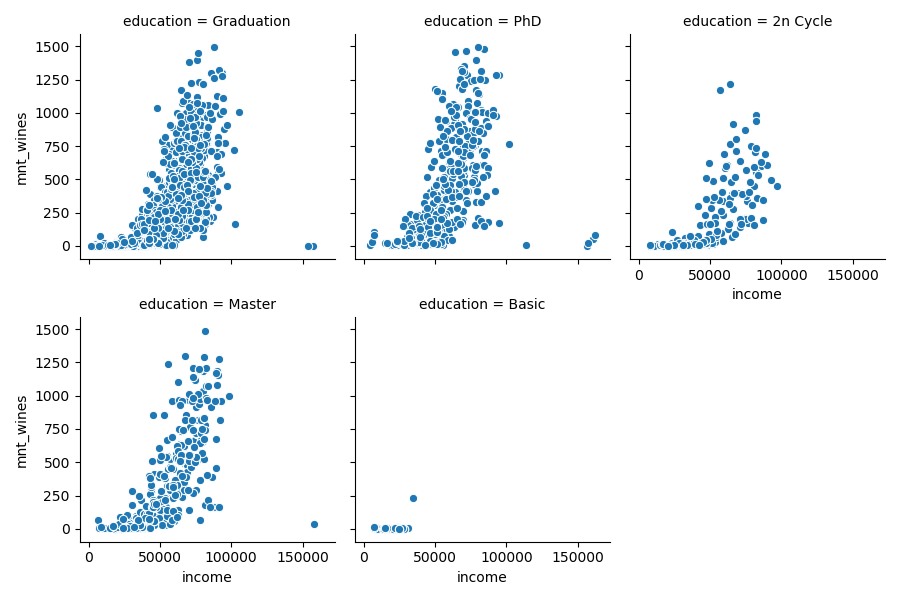

<IPython.core.display.Javascript object>


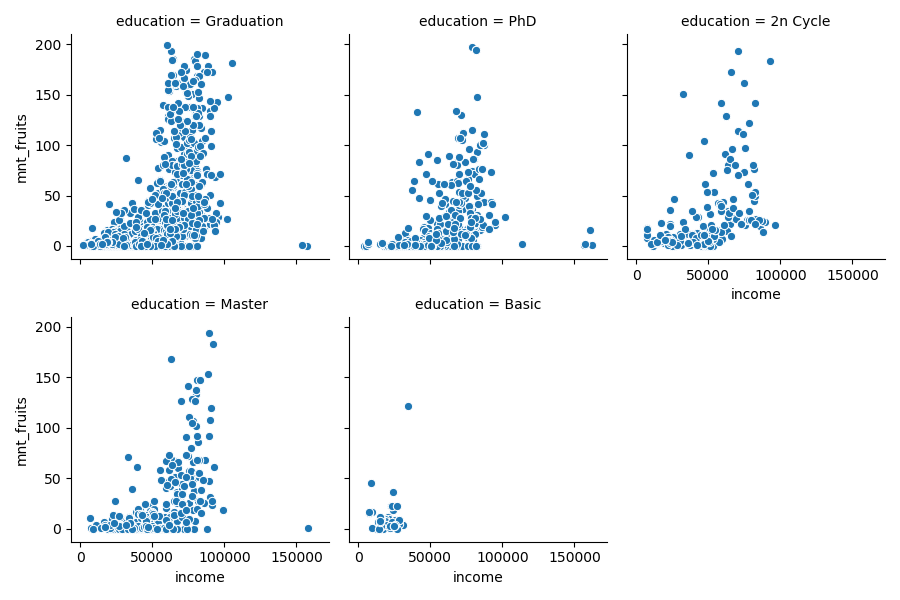

<IPython.core.display.Javascript object>


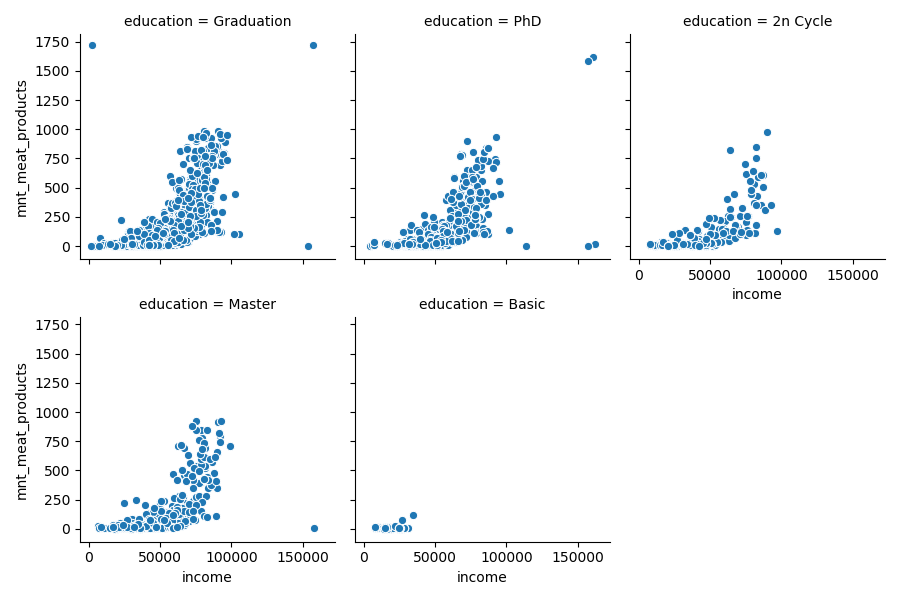

<IPython.core.display.Javascript object>


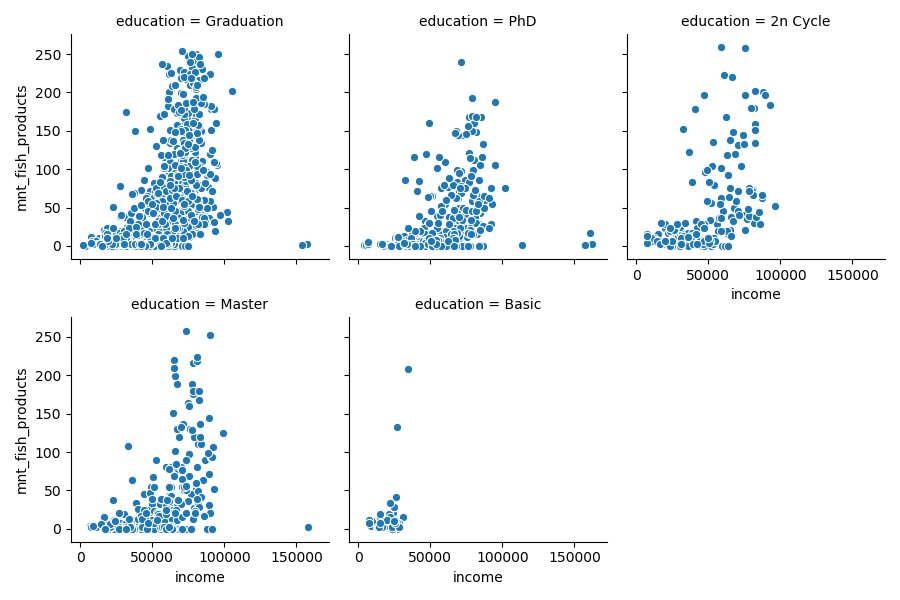

<IPython.core.display.Javascript object>


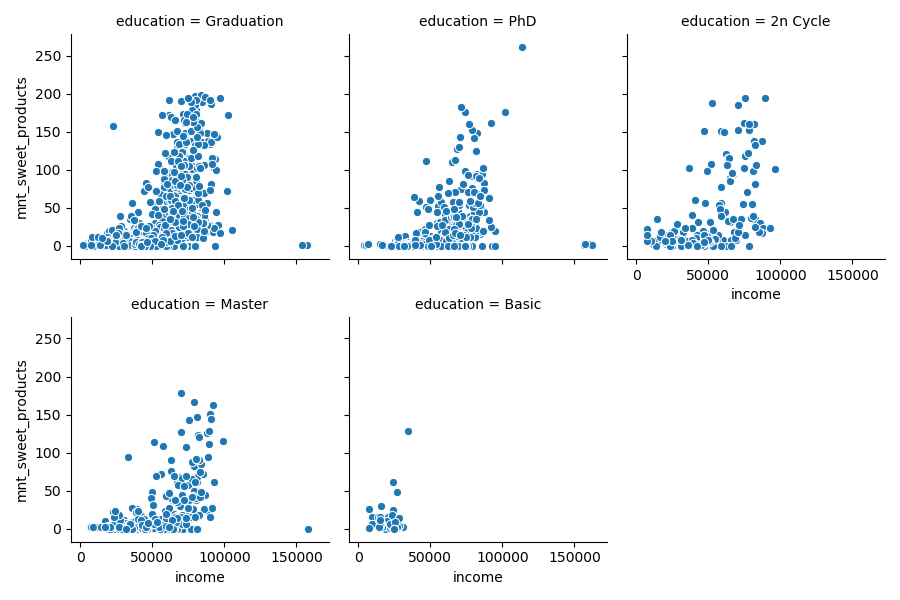

<IPython.core.display.Javascript object>


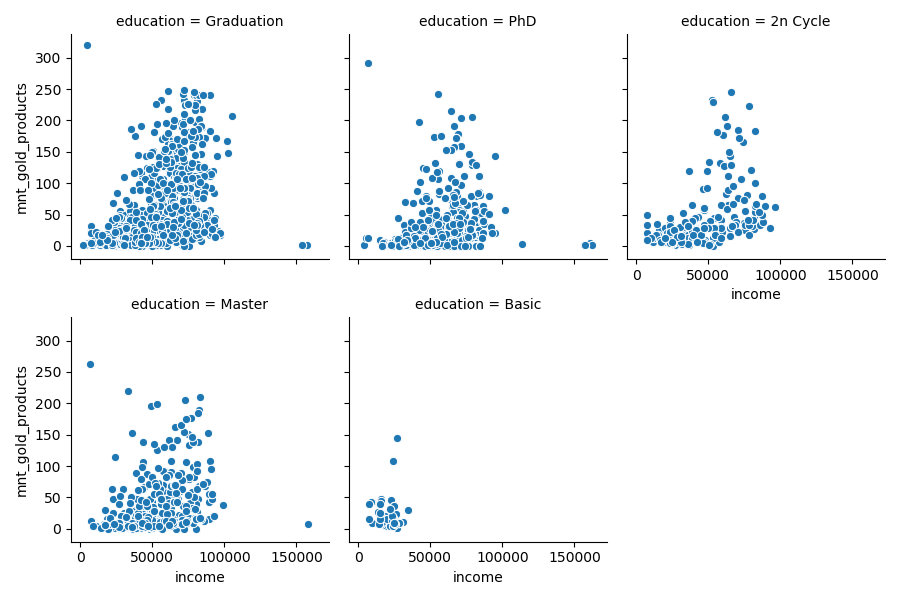

In [26]:
# dictionary used to contain dynamic variables
variable_names = {}
#amounts columns list
amounts_list = ["mnt_wines", "mnt_fruits", "mnt_meat_products", "mnt_fish_products", "mnt_sweet_products", "mnt_gold_products"]

for i in range(6):
    # defining the facet grid
    variable_names["g{0}".format(i)] = sns.FacetGrid(marketing_data, col="education", col_wrap=3)
    # mapping the facet grid with scatterplots of amounts product vs. income
    variable_names["g{0}".format(i)].map(sns.scatterplot, "income", amounts_list[i])
plt.show()

After observing the plots detailing the relationship between income, education, and purchasing behavior, the following can be seen:
* This store does not have many shoppers with a `Basic` education level.
* Regardless of the shopper's educational level, there is a positive, linear relationship for each `mnt_{type}_products`.
* `mnt_wines` has the strongest positive, linear relationship with `education` by `income`.

#### Purchasing Behavior by Age <a class="anchor" id="section3_5"></a>

The last main variable in our analysis plan is `age`. The `.scatterplot()` method is used to see if there is any relationship bewteen `age` and any purchasing behavior variables. The initial analysis showed no evidence of relationship as shown in all the graphs below. The graphs shown are:
* `total_purchases` vs. `age`
* `mnt_{type}_products` vs. `age`
* `num_{type}_purchases` vs. `age`

The process used to plot each one of these graphs is very similar to the one outlined in the Purchasing Behavior by income section.

<IPython.core.display.Javascript object>


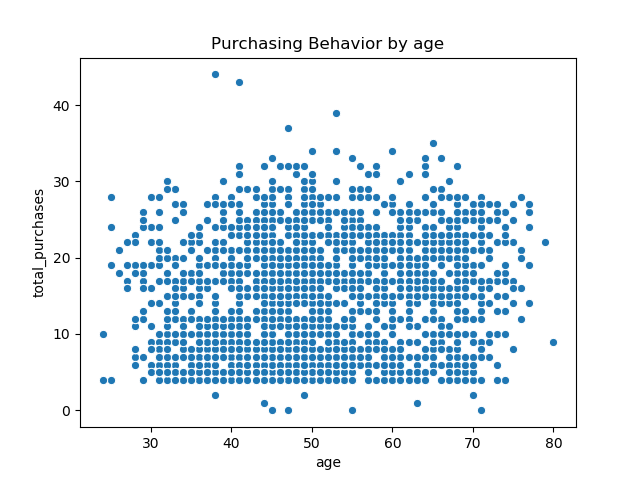

In [27]:
plt.figure()
# scatterplot of total purchases vs. age
sns.scatterplot(x=marketing_data["age"], y=marketing_data["total_purchases"])
plt.title("Purchasing Behavior by age")
plt.show()

It is hard to see any relationship between `age` and `total_purchases` in this plot.

To do further analysis on the `age` variable, A new column called `age_group` is added to `marketing_data`. It contains the following categories of ages:
* `18 to 35`
* `36 to 50`
* `51 to 70`
* `71 and Older`

In [30]:
# function that breaks up each age into a group
def age_groups(age):
    if 18 <= age <= 35 : 
        return '18 to 35' 
    elif 35 < age <= 50 : 
        return '36 to 50'
    elif 50 < age <= 70 : 
        return '51 to 70'
    else : 
        return '71 and Older'

# applying the function to the dataframe
marketing_data['age_group'] = marketing_data['age'].apply(age_groups)
    

<IPython.core.display.Javascript object>


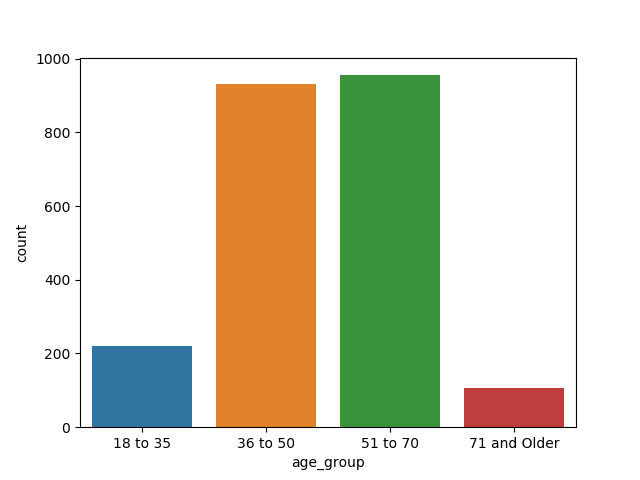

In [31]:
# plotting the age Group variable in a bar chart
plt.figure()
sns.countplot(marketing_data['age_group'], order=['18 to 35', '36 to 50', '51 to 70', '71 and Older'])
plt.show()

The `age_group` variable proved to be much more useful quickly as a bar chart showed that `36 to 50` and `51 to 70` year-old age groups dominated shopping at the store.

To take the analysis further, a new DataFrame is created, which only has information about shopper age (`age` and `age_group`) and the total purchase amounts each age group buys (`mnt_{type}_products`). This new DataFrame will have `age_groups` as row data to make plotting a grouped bar graph easier.

In [32]:
# new dataframe that is age and purchase amounts columns
age_plus_amounts = marketing_data.loc[:, ('age', 'mnt_wines', 'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products', 
'mnt_sweet_products', 'mnt_gold_products')]
# breaking up the age bins
bins = [18, 35, 50, 70, 150]
# age group labels
labels = ['18 to 35', '36 to 50', '51 to 70', '71 and Older']

# adding age group to the new dataframe as rows
age_plus_amounts['age_group'] = pd.cut(age_plus_amounts.age, bins=bins, labels=labels)
age_plus_amounts = age_plus_amounts.groupby('age_group').sum().reset_index()

In [33]:
print(age_plus_amounts)

      age_group    age  mnt_wines  mnt_fruits  mnt_meat_products  \
0      18 to 35   6957      56038        6642              44974   
1      36 to 50  41074     237527       22553             137596   
2      51 to 70  57225     329022       25336             159619   
3  71 and Older   7747      52709        3710              27281   

   mnt_fish_products  mnt_sweet_products  mnt_gold_products  
0               8801                6648               9271  
1              32303               23731              37050  
2              36399               25433              45998  
3               5776                4015               4845  


<IPython.core.display.Javascript object>


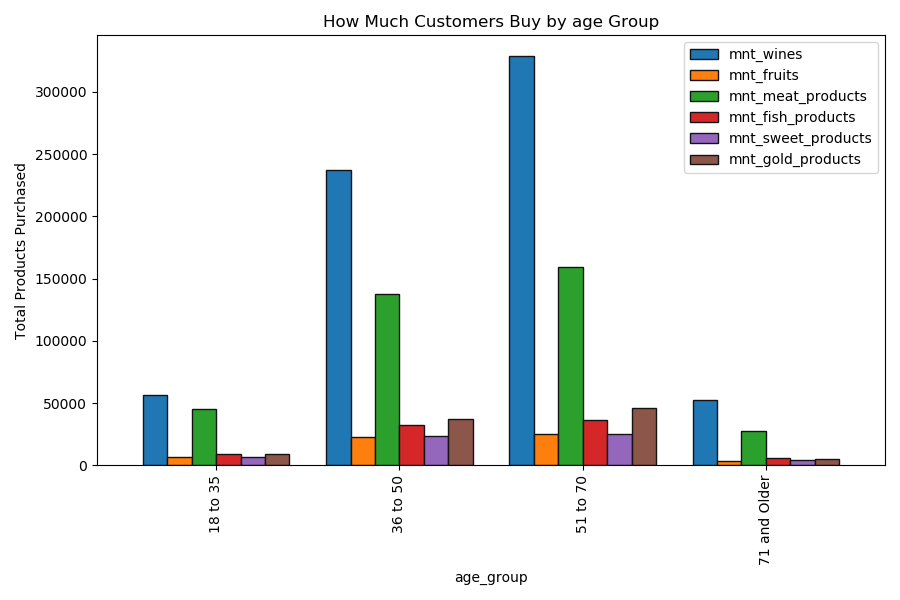

In [34]:
fig, ax = plt.subplots(figsize=(9, 6))

col_products = [
'mnt_wines', 
'mnt_fruits', 
'mnt_meat_products', 
'mnt_fish_products', 
'mnt_sweet_products', 
'mnt_gold_products'
]

# bar graph of amount of items bought in the store grouped by age group
age_plus_amounts.plot(x='age_group', y=col_products, kind='bar', ax=ax,  width=0.8, edgecolor='#131313')
plt.title("How Much Customers Buy by age Group")
plt.ylabel("Total Products Purchased")
plt.tight_layout()
plt.show()

Across the board, `age_group` does not seem to effect purchasing habits. Wine is the most popular bought item for each age group followed by meat products. The least popular bought item is fruits for each age group. The next analysis of interest is to see if `age_group` affects how many items customers buy each time. 

<IPython.core.display.Javascript object>


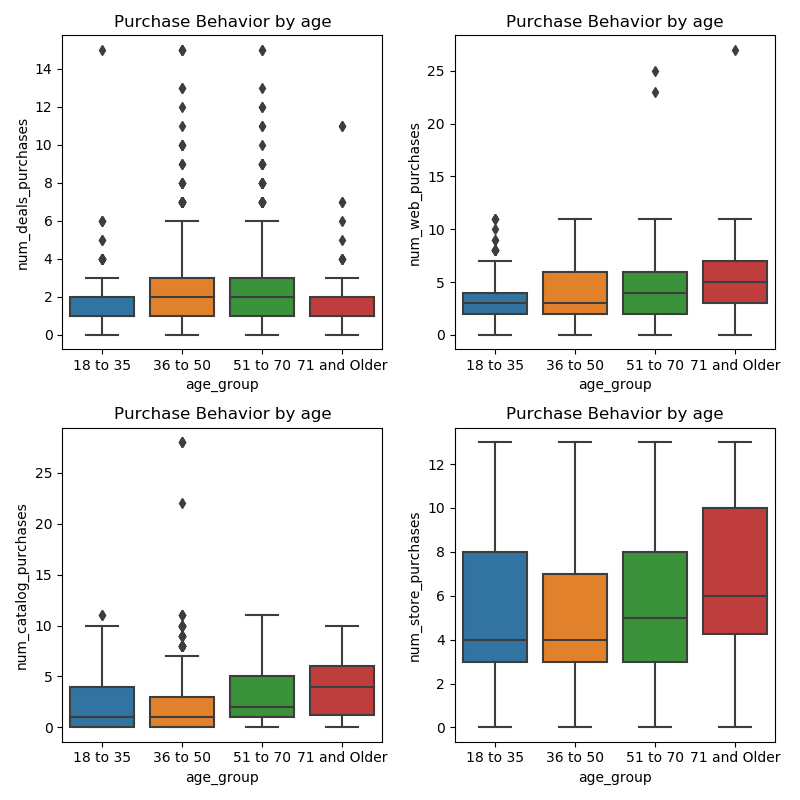

In [35]:
# num purchases columns list
num_purchases_cols = ["num_deals_purchases", "num_web_purchases", "num_catalog_purchases", "num_store_purchases"]
plot = 0
fig = plt.figure(figsize=(8,8))
# looping through the length of the list
for i in range(len(num_purchases_cols)):
    plot += 1
    # setting up the subplots
    ax = plt.subplot(2, 2, plot)
    # scatterplot of of num purchases vs. age
    sns.boxplot(x=marketing_data["age_group"], y= marketing_data[num_purchases_cols[i]], 
                order=["18 to 35", "36 to 50", "51 to 70", "71 and Older"])
    plt.title("Purchase Behavior by age")

plt.tight_layout()
plt.show()

This chart yields some very interesting insights. Here are some notable ones:
* `18 to 35` and `71 and Older` age groups tend to be the least interested in deals.
* On average, `71 and Older` age group customers tend to shop the most online, in store, and through the catalog.
* `36 to 50` and `51 to 70` age groups are interested in deals. Most likely this is because they receive more deals since they have more loyal customers.

This information could be super helpful for a marketing department as strategies could be used to increase `36 to 50` and `71 and Older` customers for the store.

### Conclusion <a class="anchor" id="conclusion"></a>

#### Findings Overview

It has been shown `income` has the strongest relationship with purchase behavior of customers. However, interesting insights about `education` and `age` along with `age_group` have still been noted. These insights would be very helpful to how this store markets deals to their customers and prices items, such as wine since higher income groups tend to dominate alcohol sales. There is also opportunity to increase market to the `18 to 35` and `71 and Older` age groups to drive products sales. 